## Visualizing Earnings Based On College Majors

This project uses a cleaned dataset on college majors sourced from [American Community Survey](https://www.census.gov/programs-surveys/acs/about.html) available at this [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

This project focuses on exploring the data quickly using visualizations, using pandas plotting within the Jupyter notebook interface. 

Some of the plots employed throughout the project:
- Scatter plot to determine potential correlation, find outliers and gain a more intuitive sense of how spread out the data is
- Histogram to get an overview of distribution of data within each column, estimate the percentage of values that fall into a range of bins or count of the data points whose values are in a particular bin
- Bar plots (Vertical or Horizontal) for analyzing categorical data; to see the difference between categories or a category corresponding to the smallest or largest values
- Box plots to visualize quartile distribution, range of values and outliers

Observations from the visualizations are summarized to answer the following questions on the dataset.  
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money? 
- Is there any link between the number of full-time employees and median salary?  

- How many majors are predominantly male? 
- How many majors are predominantly female?  
    
- Which category of majors have the most students?
- How do percentages of women compare between the top 10 and bottom 10 ranked majors?
- How do unemployment rates from top 10 and bottom 10 ranked majors​ compare?
- How does number of men compare with the number of women in each category of majors?


In [1]:
import pandas as pd
import matplotlib 
import numpy as np

# Setup Jupyter Notebook to display plots within
%matplotlib inline

#Dataset
csvfile = 'recent-grads.csv'

## Getting to know  the Dataset

In [2]:
# Load into pandas dataframe
recent_grads = pd.read_csv(csvfile)

In [3]:
# column names
recent_grads.head(0)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs


In [4]:
# First row 
#recent_grads.iloc[0]
#OR
recent_grads.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [5]:
# Look at how the data is structured by looking at a few rows at the top and bottom
# We could use df.head() and df.tail() OR benefit from jupyterhub rendering it by using the df variable
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [6]:
# column types
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
# Let's see how many columns in the dataset are numeric and what they are 
numeric_cols = recent_grads.select_dtypes(include=[np.number]).columns
#print (numeric_cols)
recent_grads[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 19 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs           173 non-null int64
dtypes: float64(5), int64(14)
memory usage: 25.8 KB


In [8]:
# Summary statistics for the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [9]:
# Number of rows
raw_data_count = recent_grads.shape[0]
print (raw_data_count)

173


In [10]:
# Drop rows containing missing values
recent_grads =  recent_grads.dropna(axis=0)

In [11]:
cleaned_data_count = recent_grads.shape[0]
print (cleaned_data_count)

172


We dropped 1 column

In [12]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Explore the connection between the following
- Sample_size and Median  
- Sample_size and Unemployment_rate  
- Full_time and Median  
- ShareWomen and Unemployment_rate  
- Men and Median  
- Women and Median

Scatterplots generated using values from 2 columns can be useful for looking into possible correlations between them

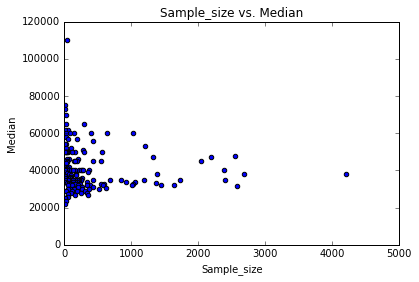

In [13]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', xlim=0)
ax.set_title('Sample_size vs. Median')

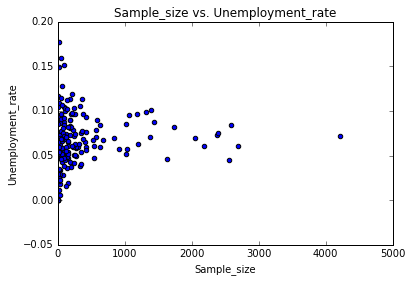

In [14]:
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',title='Sample_size vs. Unemployment_rate', xlim=0)

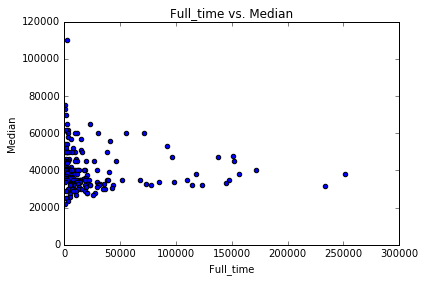

In [15]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter',title='Full_time vs. Median', xlim=0)

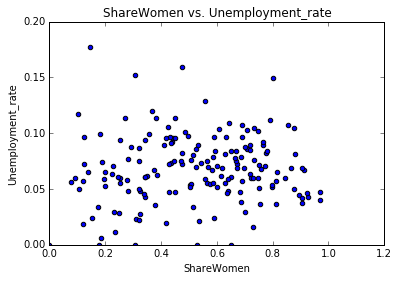

In [16]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',title='ShareWomen vs. Unemployment_rate', xlim=0, ylim=0)

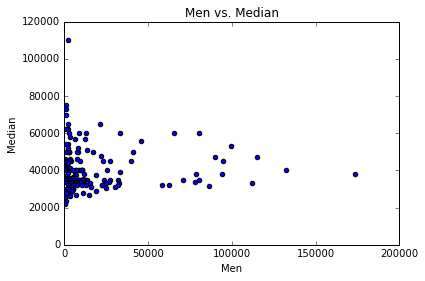

In [17]:
recent_grads.plot(x='Men',y='Median',kind='scatter',title='Men vs. Median', xlim=0, ylim=0)

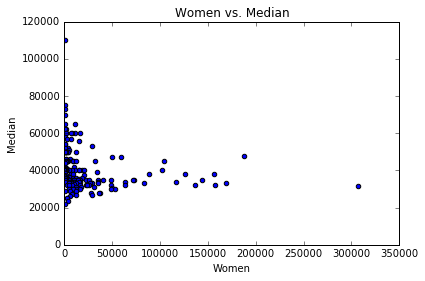

In [18]:
recent_grads.plot(x='Women',y='Median',kind='scatter',title='Women vs. Median', xlim=0)

There is no clear indication that Median earnings are connected with number `Men` or `Women`. Similarly, there is no significant connection between Median earnings and full time employment either. Nor is there a connection between Majors that are majority female and unemployment rate.

Let's explore more questions that scatter plots lend well to.
## Do students in more popular majors make more money?

In [19]:
# Sort `Total` number of people with Major and get the corresponding `Median` earnings info
recent_grads_total_median = recent_grads[['Major', 'Total','Median']]
recent_grads_total_median 
sorted_recent_grads_total_median = recent_grads_total_median.sort_values('Total',ascending=False)
sorted_recent_grads_total_median

,Major,Total,Median
145,PSYCHOLOGY,393735.0,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,38000
123,BIOLOGY,280709.0,33400
57,GENERAL BUSINESS,234590.0,40000
93,COMMUNICATIONS,213996.0,35000
34,NURSING,209394.0,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,38000
40,ACCOUNTING,198633.0,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,38000


In [20]:
sorted_recent_grads_total_median.Median.describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

In [21]:
# Display the entire rows with the `minimum` and `maximum` values of `Total`
print(sorted_recent_grads_total_median.loc[sorted_recent_grads_total_median.Total.idxmax()])
print('\n')
print(sorted_recent_grads_total_median.loc[sorted_recent_grads_total_median.Total.idxmin()])

Major     PSYCHOLOGY
Total         393735
Median         31500
Name: 145, dtype: object


Major     MILITARY TECHNOLOGIES
Total                       124
Median                    40000
Name: 73, dtype: object


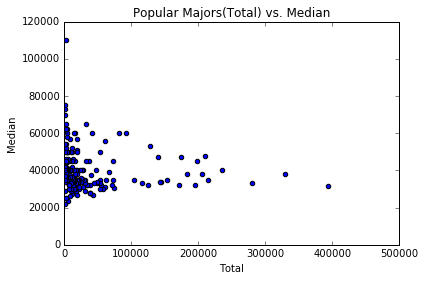

In [22]:
sorted_recent_grads_total_median.plot(x='Total',y='Median',kind='scatter',title='Popular Majors(Total) vs. Median', xlim=0)

## Answer
The scatter plot is not indicative of earnings affected by rising Total.
This observation is backed by the data which shows `PSYCHOLOGY` major being the **most popular**, has median earnings of **31500** while the **least popuar major** `MILITARY TECHNOLOGIES`has higher median earnings of **40000**.

## Do students that majored in subjects that were majority female make more money?

In [23]:
# Sort `Women as share of Total` and get the corresponding `Median` earnings info
recent_grads_ShareWomen_Median = recent_grads[['Major', 'ShareWomen','Median']]
sorted_recent_grads_ShareWomen_Median = recent_grads_ShareWomen_Median.sort_values('ShareWomen',ascending=False)
sorted_recent_grads_ShareWomen_Median

,Major,ShareWomen,Median
164,EARLY CHILDHOOD EDUCATION,0.968954,28000
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.967998,28000
51,MEDICAL ASSISTING SERVICES,0.927807,42000
138,ELEMENTARY EDUCATION,0.923745,32000
150,FAMILY AND CONSUMER SCIENCES,0.910933,30000
100,SPECIAL NEEDS EDUCATION,0.906677,35000
156,HUMAN SERVICES AND COMMUNITY ORGANIZATION,0.905590,30000
151,SOCIAL WORK,0.904075,30000
34,NURSING,0.896019,48000
88,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,0.881294,36000


In [24]:
# Find rows with the `minimum` and `maximum` values of `ShareWomen`
print(sorted_recent_grads_ShareWomen_Median.loc[sorted_recent_grads_ShareWomen_Median.ShareWomen.idxmax()])
print('\n')
print(sorted_recent_grads_ShareWomen_Median.loc[sorted_recent_grads_ShareWomen_Median.ShareWomen.idxmin()])

Major         EARLY CHILDHOOD EDUCATION
ShareWomen                     0.968954
Median                            28000
Name: 164, dtype: object


Major         MILITARY TECHNOLOGIES
ShareWomen                        0
Median                        40000
Name: 73, dtype: object


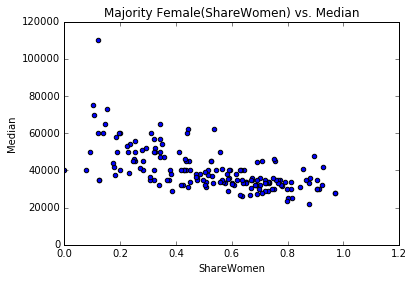

In [25]:
sorted_recent_grads_ShareWomen_Median.plot(x='ShareWomen',y='Median',kind='scatter',title='Majority Female(ShareWomen) vs. Median', xlim=0)

## Answer
From visualizing Median earnings of majors with Female Majority, the answer is no, students that major in female majority subjects don't make more money.  The trend is clearly downward indicating that the more female majority, the less earnings.

Data also shows that those who majored in `EARLY CHILDHOOD EDUCATION` with 96% female share made less than students who majored in `MILITARY TECHNOLOGIES` with **zero** females.

## Is there any link between the number of full-time employees and median salary?

In [26]:
# Sort `Full_time` employed and get the corresponding `Median` earnings info
recent_grads_FT_median = recent_grads[['Full_time','Median']]
sorted_recent_grads_FT_median = recent_grads_FT_median.sort_values('Full_time',ascending=False)
sorted_recent_grads_FT_median

,Full_time,Median
76,251540,38000
145,233205,31500
57,171385,40000
77,156668,38000
40,151967,45000
34,151191,48000
93,147335,35000
123,144512,33400
35,137921,47000
138,123177,32000


In [27]:
# Find rows with the `minimum` and `maximum` values of `Full_time` and their `Median` earnings
print(sorted_recent_grads_FT_median.loc[sorted_recent_grads_FT_median.Full_time.idxmax()])
print('\n')
print(sorted_recent_grads_FT_median.loc[sorted_recent_grads_FT_median.Full_time.idxmin()])

Full_time    251540
Median        38000
Name: 76, dtype: int64


Full_time      111
Median       40000
Name: 73, dtype: int64


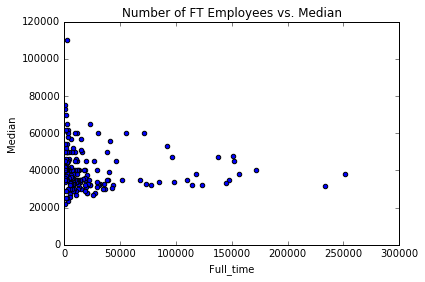

In [28]:
sorted_recent_grads_FT_median.plot(x='Full_time',y='Median', kind='scatter',title='Number of FT Employees vs. Median',xlim=0)

## Answer
Most FT earnings are in 20000-80000 range and that's for the lower end of the number employed full-time. As FT number increases, median salaries do not move up as observed by the data analysis as well.

## Explore the distributions of columns
Using Histograms will be useful here as we explore the distribution of values in a column.  Histograms generate `bins` and their frequencies and allow us to visually estimate the percentage of values that fall into a range of bins.

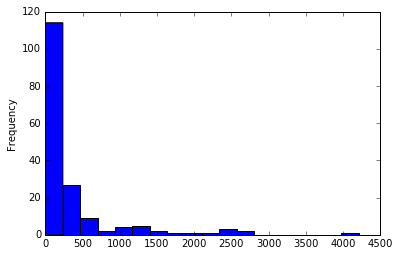

In [29]:
recent_grads['Sample_size'].plot.hist(bins=18)

In [31]:
# Let's create same number of bins, with the column's min and max values in mind. 
recent_grads.Sample_size_bins = pd.cut(x=recent_grads['Sample_size'], bins=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500])

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


In [32]:
# This gets us the count of values in each bin
recent_grads.Sample_size_bins.value_counts()


(0, 250]        118
(250, 500]       23
(500, 750]        9
(1000, 1250]      6
(1250, 1500]      4
(2500, 2750]      3
(1500, 1750]      2
(750, 1000]       2
(2000, 2250]      2
(2250, 2500]      2
(4000, 4250]      1
(1750, 2000]      0
(2750, 3000]      0
(3000, 3250]      0
(3250, 3500]      0
(3500, 3750]      0
(3750, 4000]      0
(4250, 4500]      0
Name: Sample_size, dtype: int64

I split the `Sample_size` column into 18 bins and created a new column `Sample_size_bins` (I based the number of bins on the min and max values we found from summary statistics of the numeric columns).

By doing this, values from `Sample_size` column got assigned to the appropriate bins. The unique value counts from the newly created column gets us the count of values in each bin -  the same thing that the Histogram is doing. This is helpful in backing up our observations from the Histogram that's also using the same number of bins.  

As clearly seen in the Histogram plot, the Sample sizes are concentrated in the left most bins. We can say that majority of the Sample sizes are 0-250.

Let's do the same for other columns.

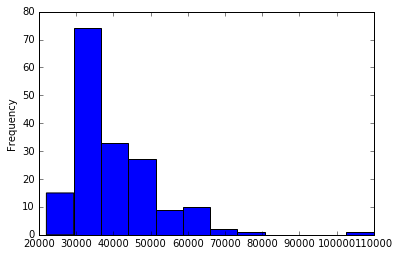

In [69]:
recent_grads.Median.plot.hist(bins=12)

In [70]:
recent_grads.Median_bins = pd.cut(x=recent_grads.Median, bins=[20000,28000,36000,44000,52000,60000,68000,76000,84000,92000,100000,108000,116000])

The upper limit of earnings for recent grads did not exceed 80K. 99K-119K is an outlier. 58% of the Majors make lower 20K-40K. 34% have earnings between 40K-60K. Only 8% earnings are in the 58K-79K bin.

In [71]:
recent_grads.Median_bins.value_counts()

(28000, 36000]      76
(36000, 44000]      36
(44000, 52000]      28
(52000, 60000]      13
(20000, 28000]      11
(60000, 68000]       4
(68000, 76000]       3
(108000, 116000]     1
(100000, 108000]     0
(92000, 100000]      0
(84000, 92000]       0
(76000, 84000]       0
Name: Median, dtype: int64

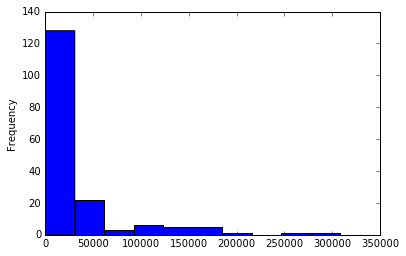

In [72]:
recent_grads.Employed.plot.hist()

In [73]:
recent_grads.Employed_bins = pd.cut(x=recent_grads.Employed, bins=[0,30000,60000,90000,120000,150000,180000,210000,240000,270000,300000,330000])

In [74]:
recent_grads.Employed_bins.value_counts()

(0, 30000]          126
(30000, 60000]       22
(90000, 120000]       6
(120000, 150000]      5
(60000, 90000]        4
(180000, 210000]      3
(150000, 180000]      3
(300000, 330000]      1
(270000, 300000]      1
(240000, 270000]      0
(210000, 240000]      0
Name: Employed, dtype: int64

Employed number ranges between 0 and nearly 300K. Over 70% of values fall within the 0-30K bin. 

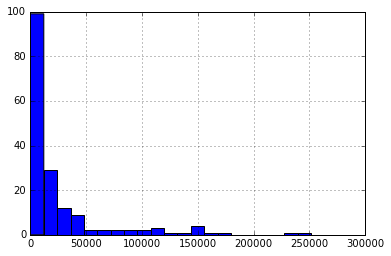

In [39]:
recent_grads.Full_time.plot.hist(bins=21)

In [40]:
recent_grads.Full_time_bins = pd.cut(x=recent_grads.Full_time, bins=[100,12100,24100,36100,48100,60100,72100,84100,96100,108100,120100,132100,144100,156100,168100,180100,192100,204100,216100,228100,240100,252100])

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [41]:
recent_grads.Full_time_bins.value_counts()

(100, 12100]        99
(12100, 24100]      29
(24100, 36100]      12
(36100, 48100]       9
(144100, 156100]     4
(108100, 120100]     3
(48100, 60100]       2
(60100, 72100]       2
(72100, 84100]       2
(84100, 96100]       2
(96100, 108100]      2
(240100, 252100]     1
(228100, 240100]     1
(132100, 144100]     1
(156100, 168100]     1
(168100, 180100]     1
(120100, 132100]     1
(180100, 192100]     0
(192100, 204100]     0
(204100, 216100]     0
(216100, 228100]     0
Name: Full_time, dtype: int64

Around 86% of the Majors fall within 50K FT Employment

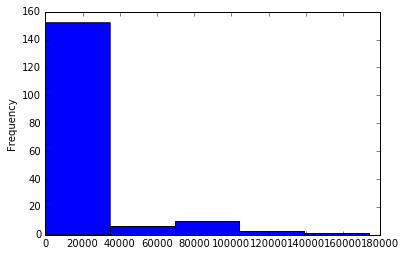

In [75]:
recent_grads.Men.plot.hist(bins=5)

In [43]:
recent_grads.Men_bins = pd.cut(x=recent_grads.Men,bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000])

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [44]:
recent_grads.Men_bins.value_counts()

(0, 10000]          111
(10000, 20000]       23
(20000, 30000]       13
(30000, 40000]        6
(80000, 90000]        4
(70000, 80000]        3
(90000, 100000]       3
(110000, 120000]      2
(60000, 70000]        2
(40000, 50000]        2
(170000, 180000]      1
(130000, 140000]      1
(50000, 60000]        1
(100000, 110000]      0
(120000, 130000]      0
(140000, 150000]      0
(150000, 160000]      0
(160000, 170000]      0
(180000, 190000]      0
Name: Men, dtype: int64

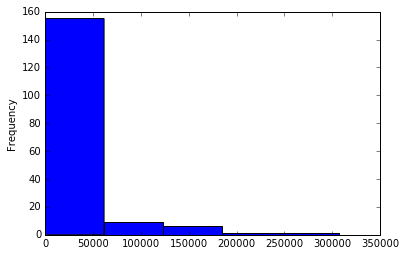

In [76]:
recent_grads.Women.plot.hist(bins=5)

Most majors have under 40K men, and nearly 60K women. This means, there are more women graduates than men. 

In [46]:
print ('Women:', recent_grads.Women.sum())
print ('Men:', recent_grads.Men.sum())

Women: 3895228.0
Men: 2876426.0


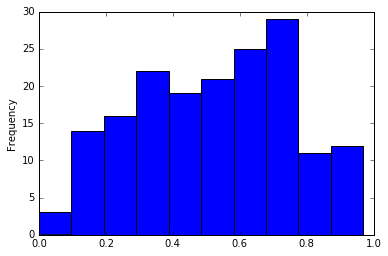

In [77]:
recent_grads.ShareWomen.plot.hist()

There is a small number (2-3)of Majors with less than 10% women. Almost 56% of the Majors are predominantly (over 50%) women. About 1.3% of the Majors are upwards of 80% women.

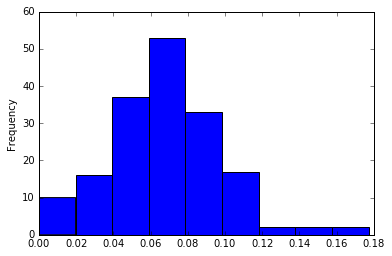

In [78]:
recent_grads.Unemployment_rate.plot.hist(bins=9)

Around 70% of Majors have unemployment rate between 4-10%.  
Around 16% of Majors have unemployment rate below 4%  
Around 10% of Majors have unemployment rate between 10-12%

## Scatter matrix plots 

In [49]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f945d958470>,
      dtype=object)

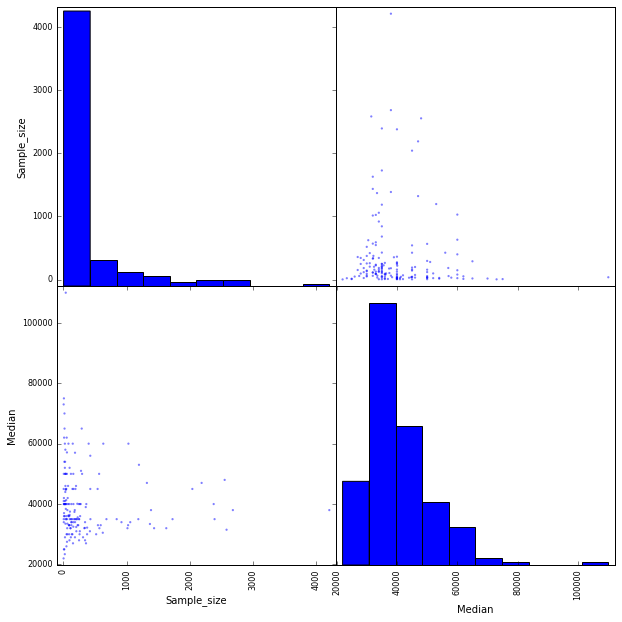

In [50]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f945d8a18d0>,
      dtype=object)

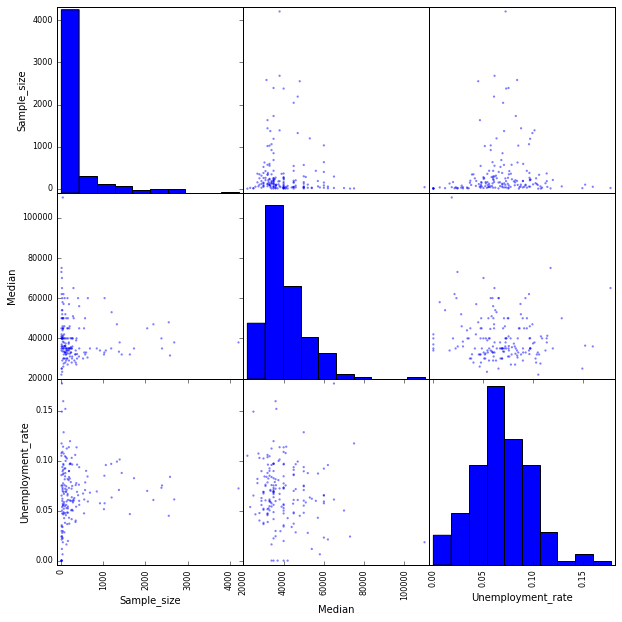

In [51]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Compare the percentages of women (ShareWomen) from the top and bottom 10 Majors.

Visualizing with bar plots will be convenient for categorical data and 10 bars isn't too many for such a plot here. The bars represent values with lengths proportional to the values and can help trace the category corresponding to the smallest or largest values.


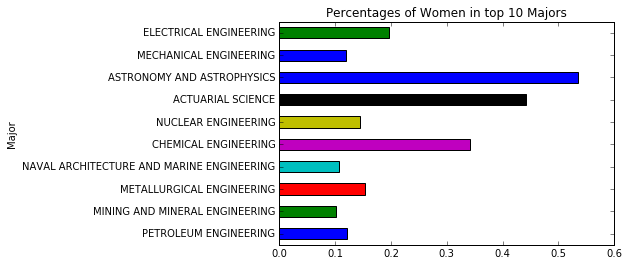

In [52]:
recent_grads[:10].plot.barh(x='Major',y='ShareWomen', title='Percentages of Women in top 10 Majors',legend=False)

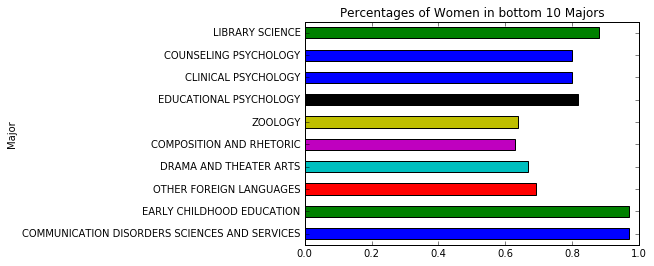

In [53]:
recent_grads[-10:].plot.barh(x='Major',y='ShareWomen', title='Percentages of Women in bottom 10 Majors',legend=False)

Almost all top ranked Majors are predominantly men. The only top ranked Major in which Women are a little over 50% is `ASTRONOMY AND ASTROPHYSICS`.  

All of the lowest ranked Majors have atleast 60% women. 3 Majors have 80-100% women  
-`COMMUNICATION DISORDERS SCIENCES AND SERVICES`  
-`EARLY CHILDHOOD EDUATION`  
-`LIBRARY SCIENCE`

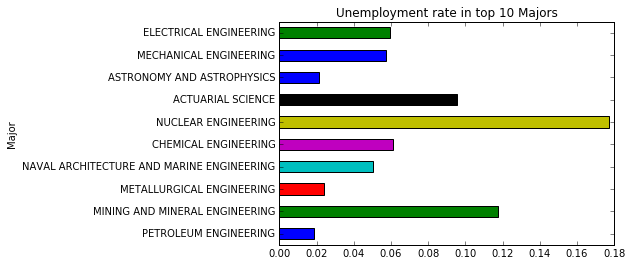

In [54]:
recent_grads[:10].plot.barh(x='Major',y='Unemployment_rate', title='Unemployment rate in top 10 Majors',legend=False)

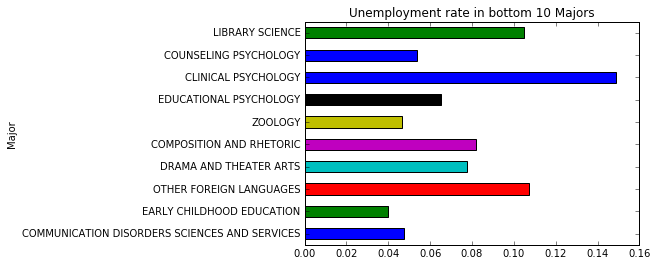

In [55]:
recent_grads[-10:].plot.barh(x='Major',y='Unemployment_rate', title='Unemployment rate in bottom 10 Majors',legend=False)

Among the top ranked Majors, these have higher unemployment rates, ranging between 10-18%   
`NUCLEAR ENGINEERING`   
`ACTUARIAL SCIENCE`  
`MINING AND MINERAL ENGINEERING`  

Interesting observation is that `NUCLEAR ENGINEERING` has more than 80% men and has the most unemployment across top and bottom ranked majors.  

For the lowest 10 ranked Majors, these have unemployment rates over 10%   
`CLINICAL PSYCHOLOGY`    
`OTHER FOREIGN LANGUAGES`  
`LIBRARY SCIENCE` 

## Further Exploration  
**1. Compare the number of `Men` with the number of `Women` in each category of Majors and visualize the results with a grouped bar plot**

In [56]:
# Aggregate to sum up men per Major Category
# Create a dictionary for count of men in each Major Category
major_men = {}
major_cats = recent_grads.Major_category.unique()
major_cats

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [57]:
# Select rows belonging to specific Major category
for m in major_cats:
    mcat_rows = recent_grads[recent_grads['Major_category'] == m]
    # Calculate the sum of Men 
    total_men = mcat_rows['Men'].sum()
    # Put it in the dictionary using Major category as key
    major_men[m] = total_men
major_men

{'Agriculture & Natural Resources': 40357.0,
 'Arts': 134390.0,
 'Biology & Life Science': 184919.0,
 'Business': 667852.0,
 'Communications & Journalism': 131921.0,
 'Computers & Mathematics': 208725.0,
 'Education': 103526.0,
 'Engineering': 408307.0,
 'Health': 75517.0,
 'Humanities & Liberal Arts': 272846.0,
 'Industrial Arts & Consumer Services': 103781.0,
 'Interdisciplinary': 2817.0,
 'Law & Public Policy': 91129.0,
 'Physical Sciences': 95390.0,
 'Psychology & Social Work': 98115.0,
 'Social Science': 256834.0}

In [58]:
# Convert `major_men` dictionary to a series object; don't sort values
m_series = pd.Series(major_men)

In [59]:
# Create a dataframe from the series `m_series`
m_series_df = pd.DataFrame(m_series,columns = ['total_men'])
m_series_df

,total_men
Agriculture & Natural Resources,40357.0
Arts,134390.0
Biology & Life Science,184919.0
Business,667852.0
Communications & Journalism,131921.0
Computers & Mathematics,208725.0
Education,103526.0
Engineering,408307.0
Health,75517.0
Humanities & Liberal Arts,272846.0


In [60]:
# Aggregate to sum up women per Major Category
# Create a dictionary for count of women in each Major Category
major_women = {}
# Select rows belonging to specific Major category
for m in major_cats:
    mcat_rows = recent_grads[recent_grads['Major_category'] == m]
    # Calculate the sum of Women 
    total_women = mcat_rows['Women'].sum()
    # Put it in the dictionary using Major category as key
    major_women[m] = total_women
major_women

{'Agriculture & Natural Resources': 35263.0,
 'Arts': 222740.0,
 'Biology & Life Science': 268943.0,
 'Business': 634524.0,
 'Communications & Journalism': 260680.0,
 'Computers & Mathematics': 90283.0,
 'Education': 455603.0,
 'Engineering': 129276.0,
 'Health': 387713.0,
 'Humanities & Liberal Arts': 440622.0,
 'Industrial Arts & Consumer Services': 126011.0,
 'Interdisciplinary': 9479.0,
 'Law & Public Policy': 87978.0,
 'Physical Sciences': 90089.0,
 'Psychology & Social Work': 382892.0,
 'Social Science': 273132.0}

In [61]:
# Create a series object from major_women dictionary
# Then, add it as a new column named `total_women` to the m_series_df DataFrame 
w_series = pd.Series(major_women)  
w_series

Agriculture & Natural Resources         35263.0
Arts                                   222740.0
Biology & Life Science                 268943.0
Business                               634524.0
Communications & Journalism            260680.0
Computers & Mathematics                 90283.0
Education                              455603.0
Engineering                            129276.0
Health                                 387713.0
Humanities & Liberal Arts              440622.0
Industrial Arts & Consumer Services    126011.0
Interdisciplinary                        9479.0
Law & Public Policy                     87978.0
Physical Sciences                       90089.0
Psychology & Social Work               382892.0
Social Science                         273132.0
dtype: float64

In [62]:
# Add the series as a new column to DataFrame `m_series_df`
m_series_df['total_women'] = w_series
m_series_df

,total_men,total_women
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0
Humanities & Liberal Arts,272846.0,440622.0


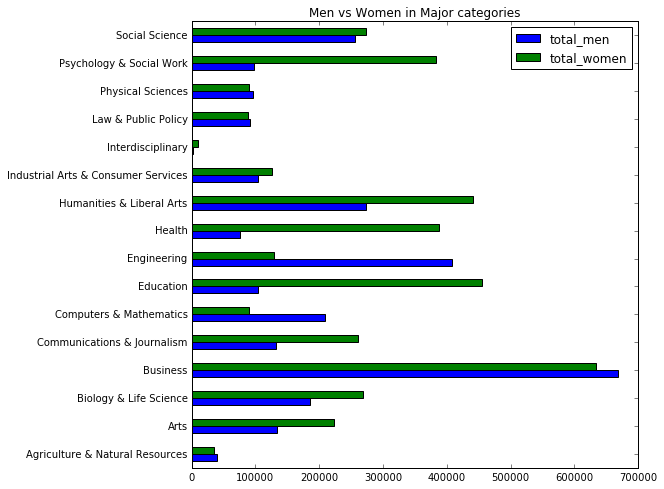

In [79]:
# Plot the dataframe
m_series_df.plot.barh(figsize=(8,8),title='Men vs Women in Major categories')

## Some interesting observations  

Number of Women tip the scale in 10 out of 16 Major categories. These are some of Major categories with female majority: 
- Psychology & Social Work  
- Humanities & Liberal Arts  
- Education  
- Health  
- Arts
- Biology & Life Science
- Communications & Journalism

`Business` being by far the most popular category for both men and women, there is much less gender gap in these categories:
 - Business
 - Social Science
 - Physical Sciences
 - Laws & Public Policy
 - Agriculture & Natural Resources

Men dominate these Major categories: 
- Engineering  
- Computers & Mathematics

Men also exceed Women (but by not as much as in the 2 categories noted above) in  
- Business  
- Law & Public Policy  
- Physical Sciences  
- Agriculture & Natural Resources



**2. Explore the distributions of median salaries and unemployment rate and visualize the results with a box plot**

In [64]:
recent_grads.Unemployment_rate.describe()

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

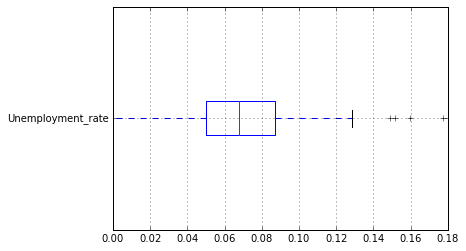

In [65]:
recent_grads.boxplot(column='Unemployment_rate', vert=False)

- The lowest unemployment rate is 0
- First quartile is ~ 0.0.5 or 5% 
- 50% of the unemployment rate data is nearly between 5% - 9%
- The median is ~ 0.068 or 6.8%
- The third quartile is ~ 0.088 05 8.8%
- The maximum unemployment rate is ~0.13 or 13%
- There are some outliers and may affect the average unemployment rate
- The data is not skewed( the median is almost in the middle of IQR )

In [66]:
recent_grads['Median'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

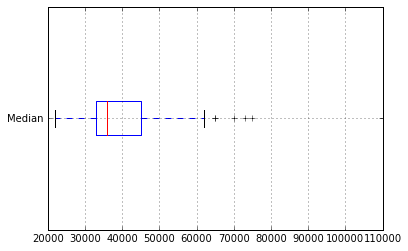

In [67]:
recent_grads.boxplot(column='Median', vert=False)

- The lowest median earnings is low 20K 
- First quartile is ~ 33K 
- 50% of the median earnings is between 33K-45K
- The median is ~ 35K
- The third quartile is ~ 45K i.e 75% of earnings fall below that
- The maximum earnings is low 60K
- There are some outliers on the high side and that would affect the average of the earnings
- The data is skewed to the right indicating data in that section is more spread out ( meaning there's a wider range in values ). The descriptive statistics of the `Median` column confirms the right skewness:  mean value (40K) is more than the median (35K)

## Experimenting with hexagonal bin plots 
Some of the scatter plots had dense points and the same data can be looked at using a hexbin plot. This will help figure if there were overlapping points, putting into bins of hexagons and coloring the bins based on their count could be more informative

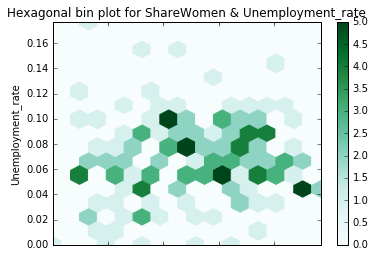

In [101]:
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate', title='Hexagonal bin plot for ShareWomen & Unemployment_rate',gridsize=15)

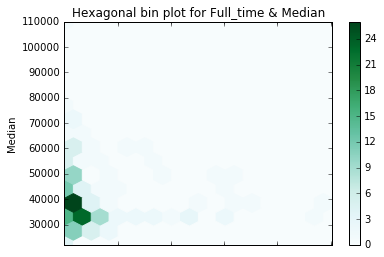

In [102]:

recent_grads.plot.hexbin(x='Full_time',y='Median',title='Hexagonal bin plot for Full_time & Median',gridsize=15)

## Summarizing the Observations from Visualizations of the dataset

- **Business** is the most popular Major category for both men and women  
- Some Major categories that have significantly less gender gap compared to others are  
**Business  
Social Science  
Physical Sciences  
Laws & Public Policy  
Agriculture & Natural Resources**

- Most salaries are in lower 20K-40K

- Popularity of a Major does not translate to higher salaries

- There is no connection between predominantly female Majors and unemployment rate

- **ASTRONOMY AND ASTROPHYSICS** stands out as 1 of the top ranked Majors that's predominantly female & with unemployment rate under 3%

- **NUCLEAR ENGINEERING** stands out as 1 of the top 10 ranked Majors that's predominantly male(has more than 80% men) & with the highest unemployment rate when compared across top and bottom 10 ranked Majors  

-  These Majors are not only among lowest 10 ranked Majors, but also have unemployment rates over 10%  
**CLINICAL PSYCHOLOGY  
OTHER FOREIGN LANGUAGES  
LIBRARY SCIENCE**

- All top 10 ranked Majors are predominantly male 

- All bottom 10 ranked Majors are predominanly female 

- Most majors have under 40K men, and nearly 60K women so, there are more women grads than men